In [11]:
#semoga kali ini jadi

import pandas as pd
import numpy as np

#load data
df_prop = pd.read_csv('Dataset UTS_Gasal 2425.csv')
df_prop.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


In [12]:
df_prop.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,50.276300,50225.486100,5.510100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.99460,4.993448e+06
std,28774.37535,28.816696,28.889171,29006.675799,2.872024,2.856667,9.30809,2876.729545,2894.33221,262.05017,3.17641,2.877424e+06
min,89.00000,1.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.00000,1.031350e+04
25%,25098.50000,25.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.00000,2.516402e+06
50%,50105.50000,50.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.00000,5.016180e+06
75%,74609.75000,75.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,8.00000,7.469092e+06
max,99999.00000,100.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,10.00000,1.000677e+07


In [13]:
df_prop2 = df_prop.drop('price', axis=1)
df_prop2['category'].value_counts()

category
Basic     4344
Luxury    3065
Middle    2591
Name: count, dtype: int64

In [14]:
print("data null\n", df_prop2.isnull().sum())
print("data kosong\n", df_prop2.empty)
print("data nan\n", df_prop2.isna().sum())


data null
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64
data kosong
 False
data nan
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64


In [15]:
print("Sebelum drop missing value \n",df_prop2.shape)
df_prop2= df_prop2.dropna(how='any',inplace=False)
print("Sesudah drop missing value \n",df_prop2.shape)

Sebelum drop missing value 
 (10000, 17)
Sesudah drop missing value 
 (10000, 17)


In [16]:
print("sebelum cek duplikat \n",df_prop2.shape)
df_prop3=df_prop2.drop_duplicates(keep='last')
print("sesudah cek duplikat \n",df_prop3.shape)

sebelum cek duplikat 
 (10000, 17)
sesudah cek duplikat 
 (10000, 17)


In [17]:
from sklearn.model_selection import train_test_split
x = df_prop3.drop(columns='category', axis=1)
y = df_prop3['category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=83)

print(x_train.shape)
print(x_test.shape)

(7000, 16)
(3000, 16)


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

kolom_kategori=['hasyard','haspool','isnewbuilt','hasstormprotector','hasstorageroom']

transform = make_column_transformer(
    (OneHotEncoder(), kolom_kategori),remainder='passthrough'
)

In [19]:
x_train_enc = transform.fit_transform(x_train)

x_test_enc = transform.fit_transform(x_test)

df_train_enc = pd.DataFrame(x_train_enc,columns=transform.get_feature_names_out())
df_test_enc = pd.DataFrame(x_test_enc,columns=transform.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,81.0,46.0,49263.0,9.0,2.0,2004.0,5221.0,7101.0,289.0,4.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,51.0,43.0,50903.0,2.0,2.0,1992.0,8005.0,7138.0,113.0,10.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,51.0,26.0,86507.0,8.0,6.0,2006.0,730.0,5692.0,935.0,3.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,21.0,55.0,5727.0,5.0,1.0,2000.0,2872.0,851.0,565.0,5.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,33.0,56.0,3014.0,10.0,6.0,2001.0,8835.0,9875.0,559.0,0.0
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,88.0,35.0,32911.0,7.0,8.0,2006.0,6209.0,8195.0,134.0,6.0
6,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,17.0,32.0,64941.0,7.0,2.0,2012.0,9907.0,1932.0,728.0,4.0
7,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,12.0,6.0,11203.0,2.0,1.0,2008.0,8781.0,1584.0,599.0,10.0
8,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,69.0,87.0,38738.0,4.0,1.0,2006.0,7388.0,3537.0,791.0,4.0
9,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,11.0,81.0,68456.0,1.0,4.0,2008.0,7269.0,1015.0,715.0,4.0


In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

pipe_svm = Pipeline([
    ('scale', MinMaxScaler()),
    ('feat_select',SelectPercentile()),
    ('clf', SVC(class_weight='balanced'))
])

params_grid_svm=[
    {
        'scale' : [MinMaxScaler()],
        'feat_select': [SelectPercentile()],
        'feat_select__percentile' : np.arange(20,50),
        'clf__kernel' : ['poly','rbf'],
         'clf__C' : [0.1,1],
    'clf__gamma' : [0.1,1]
    },
    {
        'scale' : [StandardScaler()],
        'feat_select': [SelectPercentile()],
        'feat_select__percentile' : np.arange(20,50),
        'clf__kernel' : ['poly','rbf'],
         'clf__C' : [0.1,1],
    'clf__gamma' : [0.1,1]
    }
]

estimator_svm = Pipeline(pipe_svm)

SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=83)

GSCV_SVM_SP = GridSearchCV(pipe_svm,params_grid_svm,cv=SKF)

GSCV_SVM_SP.fit(x_train_enc,y_train)
print("GSCV Finished")
#35 menit

GSCV Finished


CV Score :  0.9951428571428572
Test Score :  0.995
Best Model :  Pipeline(steps=[('scale', StandardScaler()),
                ('feat_select', SelectPercentile(percentile=31)),
                ('clf',
                 SVC(C=1, class_weight='balanced', gamma=1, kernel='poly'))])
Best Feature :  Index(['onehotencoder__hasyard_no', 'onehotencoder__hasyard_yes',
       'onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_new', 'onehotencoder__isnewbuilt_old',
       'remainder__squaremeters'],
      dtype='object')


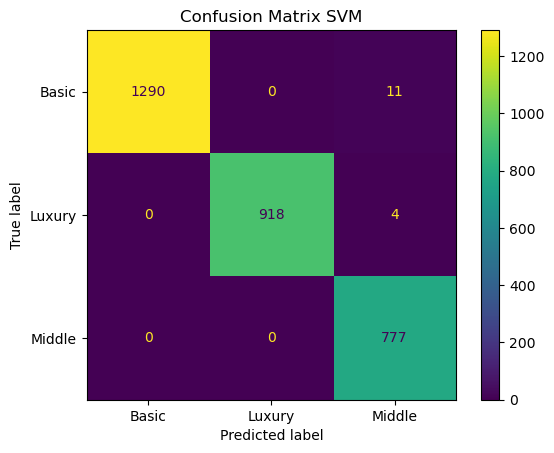

Classification Report SVM : 
               precision    recall  f1-score   support

       Basic       1.00      0.99      1.00      1301
      Luxury       1.00      1.00      1.00       922
      Middle       0.98      1.00      0.99       777

    accuracy                           0.99      3000
   macro avg       0.99      1.00      0.99      3000
weighted avg       1.00      0.99      1.00      3000



In [24]:
print("CV Score : ",format(GSCV_SVM_SP.best_score_))

print("Test Score : ",format(GSCV_SVM_SP.best_estimator_.score(x_test_enc,y_test)))

print("Best Model : ",GSCV_SVM_SP.best_estimator_)
mask = GSCV_SVM_SP.best_estimator_.named_steps['feat_select'].get_support()
print("Best Feature : ",df_train_enc.columns[mask])

SVM_pred = GSCV_SVM_SP.predict(x_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, SVM_pred, labels=GSCV_SVM_SP.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_SVM_SP.classes_)
disp.plot()
plt.title('Confusion Matrix SVM')
plt.show()

print("Classification Report SVM : \n",classification_report(y_test, SVM_pred))

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

pipe_svm = Pipeline([
    ('scale', MinMaxScaler()),
    ('feat_select',SelectKBest()),
    ('clf', SVC(class_weight='balanced'))
])

params_grid_svm=[
    {
    'scale' : [MinMaxScaler()],
    'feat_select__k' : np.arange(2,6),
    'clf__kernel' : ['poly','rbf'],
    'clf__C' : [0.1,1],
    'clf__gamma' : [0.1,1]
    },
    {
    'scale' : [StandardScaler()],
    'feat_select__k' : np.arange(2,6),
    'clf__kernel' : ['poly','rbf'],
     'clf__C' : [0.1,1],
    'clf__gamma' : [0.1,1]
    }
]

estimator_svm = Pipeline(pipe_svm)

SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=83)

GSCV_SVM_SKB = GridSearchCV(pipe_svm,params_grid_svm,cv=SKF)

GSCV_SVM_SKB.fit(x_train_enc,y_train)
print("GSCV Finished")
#35 menit

GSCV Finished


CV Score :  0.9275714285714287
Test Score :  0.9273333333333333
Best Model :  Pipeline(steps=[('scale', StandardScaler()), ('feat_select', SelectKBest(k=5)),
                ('clf',
                 SVC(C=1, class_weight='balanced', gamma=1, kernel='poly'))])
Best Feature :  Index(['onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_new', 'onehotencoder__isnewbuilt_old',
       'remainder__squaremeters'],
      dtype='object')


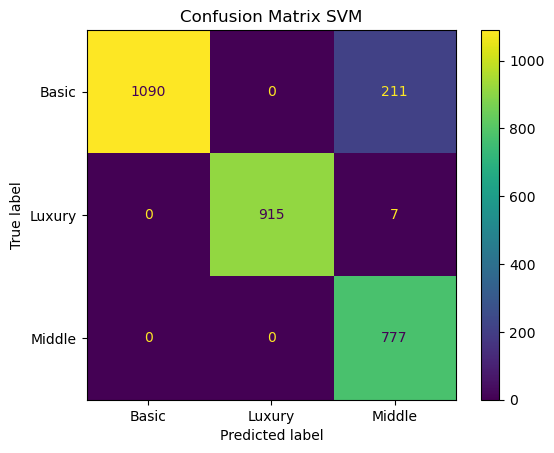

Classification Report SVM : 
               precision    recall  f1-score   support

       Basic       1.00      0.84      0.91      1301
      Luxury       1.00      0.99      1.00       922
      Middle       0.78      1.00      0.88       777

    accuracy                           0.93      3000
   macro avg       0.93      0.94      0.93      3000
weighted avg       0.94      0.93      0.93      3000



In [27]:
print("CV Score : ",format(GSCV_SVM_SKB.best_score_))

print("Test Score : ",format(GSCV_SVM_SKB.best_estimator_.score(x_test_enc,y_test)))

print("Best Model : ",GSCV_SVM_SKB.best_estimator_)
mask = GSCV_SVM_SKB.best_estimator_.named_steps['feat_select'].get_support()
print("Best Feature : ",df_train_enc.columns[mask])

SVM_pred = GSCV_SVM_SKB.predict(x_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, SVM_pred, labels=GSCV_SVM_SKB.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_SVM_SKB.classes_)
disp.plot()
plt.title('Confusion Matrix SVM')
plt.show()

print("Classification Report SVM : \n",classification_report(y_test, SVM_pred))

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, SelectPercentile

pipe_GBT = Pipeline(steps=[
    ('feat_select', SelectPercentile()),
    ('clf', GradientBoostingClassifier(random_state=83))])

param_grid_GBT = [
    {
        'feat_select' : [SelectPercentile()],
        'feat_select__percentile' : np.arange(20,50),
        'clf__max_depth': [*np.arange(4,5)],
        'clf__n_estimators': [100,150],
        'clf__learning_rate': [0.01,0.1,1]
    },
    {
        'feat_select' : [SelectPercentile()],
        'feat_select__percentile' : np.arange(20,50),
        'clf__max_depth': [*np.arange(4,5)],
        'clf__n_estimators': [100,150],
        'clf__learning_rate': [0.01,0.1,1]
    }
] 

GSCV_GBT_SP = GridSearchCV(pipe_GBT, param_grid_GBT, cv=StratifiedKFold(n_splits=5))
GSCV_GBT_SP.fit(x_train_enc, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('feat_select', SelectPercentile()),
                                       ('clf',
                                        GradientBoostingClassifier(random_state=83))]),
             param_grid=[{'clf__learning_rate': [0.01, 0.1, 1],
                          'clf__max_depth': [4],
                          'clf__n_estimators': [100, 150],
                          'feat_select': [SelectPercentile()],
                          'feat_select__percentile': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                         {'clf__learning_rate': [0.01, 0.1, 1],
                          'clf__max_depth': [4],
                          'clf__n_estimators': [100, 150],
                          'feat_select': [SelectPercentile()],
                          'feat_select__percentile': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}])

CV Score : 0.9991428571428571
Test Score : 0.9996666666666667
Best Model :  Pipeline(steps=[('feat_select', SelectPercentile(percentile=29)),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=4,
                                            random_state=83))])
Best Features: Index(['onehotencoder__hasyard_no', 'onehotencoder__haspool_no',
       'onehotencoder__haspool_yes', 'onehotencoder__isnewbuilt_new',
       'onehotencoder__isnewbuilt_old', 'remainder__squaremeters'],
      dtype='object')


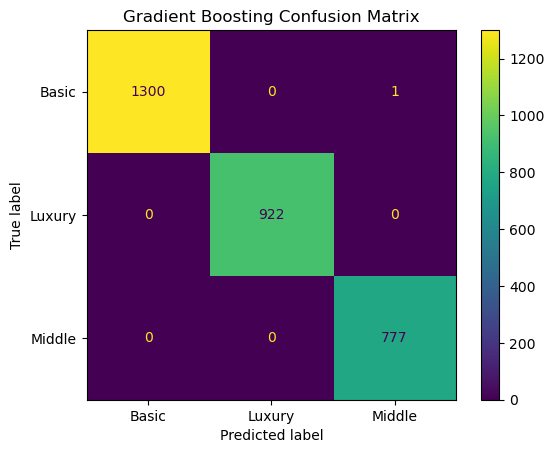

Classification report Gradient Boosting:
               precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      1301
      Luxury       1.00      1.00      1.00       922
      Middle       1.00      1.00      1.00       777

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [42]:

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("CV Score : {}".format(GSCV_GBT_SP.best_score_))
print("Test Score : {}".format(GSCV_GBT_SP.best_estimator_.score(x_test_enc, y_test)))
print("Best Model : ", GSCV_GBT_SP.best_estimator_)

mask = GSCV_GBT_SP.best_estimator_.named_steps['feat_select'].get_support()
print("Best Features:", df_train_enc.columns[mask])

RF_pred = GSCV_GBT_SP.predict(x_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, RF_pred, labels=GSCV_GBT_SP.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=GSCV_GBT_SP.classes_)
disp.plot()

plt.title("Gradient Boosting Confusion Matrix")
plt.show()
print("Classification report Gradient Boosting:\n",classification_report(y_test,RF_pred))


In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, SelectPercentile

pipe_GBT = Pipeline(steps=[
    ('feat_select', SelectKBest()),
    ('clf', GradientBoostingClassifier(random_state=83))])

param_grid_GBT = [
    {
        'feat_select__k' : np.arange(2,6),
        'clf__max_depth': [*np.arange(4,5)],
        'clf__n_estimators': [100,150],
        'clf__learning_rate': [0.01,0.1,1]
    },
    {
        'feat_select__k' : np.arange(2,6),
        'clf__max_depth': [*np.arange(4,5)],
        'clf__n_estimators': [100,150],
        'clf__learning_rate': [0.01,0.1,1]
    }
] 

GSCV_GBT_SK = GridSearchCV(pipe_GBT, param_grid_GBT, cv=StratifiedKFold(n_splits=5))
GSCV_GBT_SK.fit(x_train_enc, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('feat_select', SelectKBest()),
                                       ('clf',
                                        GradientBoostingClassifier(random_state=83))]),
             param_grid=[{'clf__learning_rate': [0.01, 0.1, 1],
                          'clf__max_depth': [4],
                          'clf__n_estimators': [100, 150],
                          'feat_select__k': array([2, 3, 4, 5])},
                         {'clf__learning_rate': [0.01, 0.1, 1],
                          'clf__max_depth': [4],
                          'clf__n_estimators': [100, 150],
                          'feat_select__k': array([2, 3, 4, 5])}])

CV Score : 0.9385714285714286
Test Score : 0.9323333333333333
Best Model :  Pipeline(steps=[('feat_select', SelectKBest(k=4)),
                ('clf',
                 GradientBoostingClassifier(max_depth=4, n_estimators=150,
                                            random_state=83))])
Best Features: Index(['onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_new', 'remainder__squaremeters'],
      dtype='object')


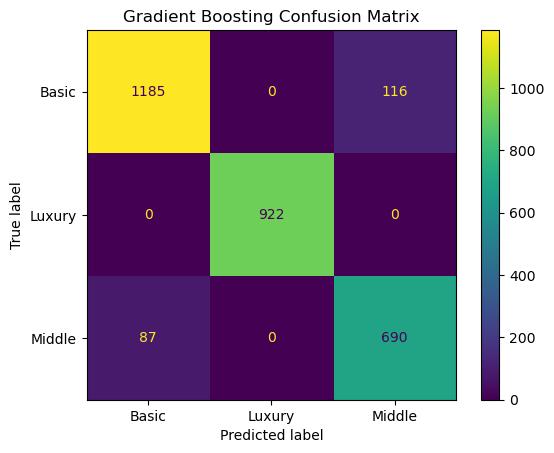

Classification report Gradient Boosting:
               precision    recall  f1-score   support

       Basic       0.93      0.91      0.92      1301
      Luxury       1.00      1.00      1.00       922
      Middle       0.86      0.89      0.87       777

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



In [44]:

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("CV Score : {}".format(GSCV_GBT_SK.best_score_))
print("Test Score : {}".format(GSCV_GBT_SK.best_estimator_.score(x_test_enc, y_test)))
print("Best Model : ", GSCV_GBT_SK.best_estimator_)

mask = GSCV_GBT_SK.best_estimator_.named_steps['feat_select'].get_support()
print("Best Features:", df_train_enc.columns[mask])

RF_pred = GSCV_GBT_SK.predict(x_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, RF_pred, labels=GSCV_GBT_SK.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=GSCV_GBT_SK.classes_)
disp.plot()

plt.title("Gradient Boosting Confusion Matrix")
plt.show()
print("Classification report Gradient Boosting:\n",classification_report(y_test,RF_pred))


In [45]:
import pickle

with open('model_GBT.pkl', 'wb') as file:
    pickle.dump(GSCV_GBT_SP, file)

In [46]:
import sklearn
print(sklearn.__version__)


1.4.2
